<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Assignments/Assignment_5_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 5

Due EOD Monday Oct 21st.



# Question 1:

{Method, answer}

Discussion:
* Consider some parameters are in the exponential and some aren't. Do you think the optimizer is going to treat everything evenly or will some parameters be more sensative? (the solution is more sensative to the terms in the exponential. You can mitigate this a little by taking the ln of the function which is the 'alternate answer')
*  The data given is equally spaced in T. What would happen if the data were not evenly spaced? (Nothing - curve fit does not require evenly spaced data)

Given the data in (T, k) columns,

In [5]:
import numpy as np
data = np.array([[2.73000000e+02, 4.45900132e+03],
       [2.76030303e+02, 4.41776331e+03],
       [2.79060606e+02, 7.02912764e+03],
       [2.82090909e+02, 8.07233255e+03],
       [2.85121212e+02, 1.35655353e+04],
       [2.88151515e+02, 1.53935301e+04],
       [2.91181818e+02, 1.66518521e+04],
       [2.94212121e+02, 2.57056205e+04],
       [2.97242424e+02, 2.80402378e+04],
       [3.00272727e+02, 3.52850720e+04],
       [3.03303030e+02, 2.53348206e+04],
       [3.06333333e+02, 6.20422294e+04],
       [3.09363636e+02, 5.65720969e+04],
       [3.12393939e+02, 8.94469023e+04],
       [3.15424242e+02, 9.65941942e+04],
       [3.18454545e+02, 1.14139663e+05],
       [3.21484848e+02, 1.00384893e+05],
       [3.24515152e+02, 1.60315046e+05],
       [3.27545455e+02, 1.75487522e+05],
       [3.30575758e+02, 2.79200552e+05],
       [3.33606061e+02, 2.83492579e+05],
       [3.36636364e+02, 2.19343286e+05],
       [3.39666667e+02, 3.46339717e+05],
       [3.42696970e+02, 3.29907107e+05],
       [3.45727273e+02, 2.99334626e+05],
       [3.48757576e+02, 4.85091915e+05],
       [3.51787879e+02, 7.28675595e+05],
       [3.54818182e+02, 9.91612106e+05],
       [3.57848485e+02, 9.39914377e+05],
       [3.60878788e+02, 1.46925677e+06],
       [3.63909091e+02, 1.46126057e+06],
       [3.66939394e+02, 1.35738053e+06],
       [3.69969697e+02, 1.14736966e+06],
       [3.73000000e+02, 2.10254656e+06],
       [3.76030303e+02, 1.12017395e+06],
       [3.79060606e+02, 2.34226319e+06],
       [3.82090909e+02, 2.22858410e+06],
       [3.85121212e+02, 3.26613076e+06],
       [3.88151515e+02, 3.68055559e+06],
       [3.91181818e+02, 2.37869512e+06],
       [3.94212121e+02, 4.10021974e+06],
       [3.97242424e+02, 3.84314791e+06],
       [4.00272727e+02, 6.46893402e+06],
       [4.03303030e+02, 5.35422811e+06],
       [4.06333333e+02, 7.73962115e+06],
       [4.09363636e+02, 8.41409713e+06],
       [4.12393939e+02, 7.81006766e+06],
       [4.15424242e+02, 8.35579617e+06],
       [4.18454545e+02, 1.03669786e+07],
       [4.21484848e+02, 1.02992887e+07],
       [4.24515152e+02, 6.39189417e+06],
       [4.27545455e+02, 1.36405449e+07],
       [4.30575758e+02, 1.49410729e+07],
       [4.33606061e+02, 2.09149077e+07],
       [4.36636364e+02, 2.14703032e+07],
       [4.39666667e+02, 2.11464887e+07],
       [4.42696970e+02, 2.60359855e+07],
       [4.45727273e+02, 3.19593647e+07],
       [4.48757576e+02, 2.84547486e+07],
       [4.51787879e+02, 2.98421720e+07],
       [4.54818182e+02, 3.54693846e+07],
       [4.57848485e+02, 4.17941703e+07],
       [4.60878788e+02, 4.65948030e+07],
       [4.63909091e+02, 5.74740135e+07],
       [4.66939394e+02, 4.12282427e+07],
       [4.69969697e+02, 6.43295352e+07],
       [4.73000000e+02, 6.78921367e+07],
       [4.76030303e+02, 6.87155479e+07],
       [4.79060606e+02, 6.70678776e+07],
       [4.82090909e+02, 6.23342574e+07],
       [4.85121212e+02, 9.48617775e+07],
       [4.88151515e+02, 9.34710486e+07],
       [4.91181818e+02, 8.25781385e+07],
       [4.94212121e+02, 1.02888832e+08],
       [4.97242424e+02, 9.99071191e+07],
       [5.00272727e+02, 1.01319698e+08],
       [5.03303030e+02, 1.32602108e+08],
       [5.06333333e+02, 1.31923942e+08],
       [5.09363636e+02, 1.00146518e+08],
       [5.12393939e+02, 1.48398130e+08],
       [5.15424242e+02, 2.01128065e+08],
       [5.18454545e+02, 2.25792703e+08],
       [5.21484848e+02, 1.99863590e+08],
       [5.24515152e+02, 2.47074414e+08],
       [5.27545455e+02, 2.08548654e+08],
       [5.30575758e+02, 1.83449792e+08],
       [5.33606061e+02, 2.58856094e+08],
       [5.36636364e+02, 3.10038100e+08],
       [5.39666667e+02, 3.58956357e+08],
       [5.42696970e+02, 3.21512830e+08],
       [5.45727273e+02, 4.30773903e+08],
       [5.48757576e+02, 4.39179856e+08],
       [5.51787879e+02, 4.57110476e+08],
       [5.54818182e+02, 3.75292342e+08],
       [5.57848485e+02, 3.97574548e+08],
       [5.60878788e+02, 4.57516936e+08],
       [5.63909091e+02, 2.63845055e+08],
       [5.66939394e+02, 4.59249219e+08],
       [5.69969697e+02, 5.23677345e+08],
       [5.73000000e+02, 7.51098462e+08]])

fit a modified Arrhenius curve of the form:

$$k = [A +B T]e^{\frac{-E}{RT}} $$

where $R$ is the Ideal gas constant.




###Answers

Fitted A: -2.75e+12
Fitted B: 8.10e+09
Fitted E: 38529.77


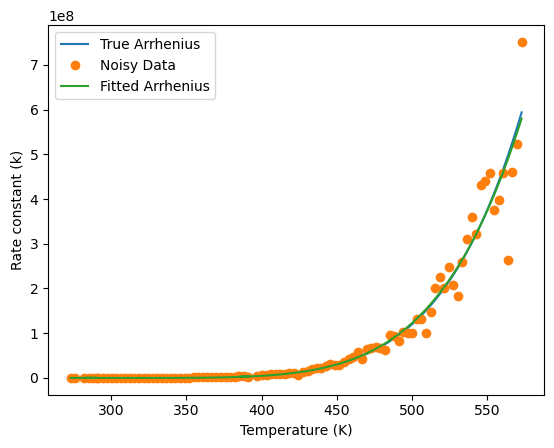

In [8]:
# prompt: generate data with 10% noise for an arrhenius equation and then use curvefit to find the parameters

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Arrhenius equation
def arrhenius(T, A, B, E):
  R = 8.314  # Ideal gas constant in J/(mol*K)
  return (A+B*T) * np.exp(-E / (R * T))

# Generate some sample data
T = np.linspace(273, 573, 100)  # Temperatures in Kelvin
A_true = 1e13  # True pre-exponential factor
B_true = 2e10  # True pre-exponential factor
E_true = 50000  # True activation energy in J/mol

k_true = arrhenius(T, A_true, B_true, E_true)
k_noisy = k_true * (1 + 0.2 * np.random.randn(len(T)))  # Add 10% noise


#data = np.column_stack([T, k_noisy])
T, k_noisy = data[:,0], data[:,1]

# Fit the Arrhenius equation to the noisy data
popt, pcov = curve_fit(arrhenius, T, k_noisy)

A_fit, B_fit, E_fit = popt

# Print the fitted parameters
print(f"Fitted A: {A_fit:.2e}")
print(f"Fitted B: {B_fit:.2e}")
print(f"Fitted E: {E_fit:.2f}")

# Plot the data and the fitted curve
plt.plot(T, k_true, label="True Arrhenius")
plt.plot(T, k_noisy, 'o', label="Noisy Data")
plt.plot(T, arrhenius(T, A_fit, B_fit, E_fit), label="Fitted Arrhenius")
plt.xlabel("Temperature (K)")
plt.ylabel("Rate constant (k)")
plt.legend()
plt.show()


### Alternate answer (Also correct!)

Fitted A: -3.56e+12
Fitted B: 2.03e+10
Fitted E: 45439.76


C:\Users\wellandm\AppData\Local\Temp\ipykernel_26112\2359358989.py:4: RuntimeWarning: invalid value encountered in log
  return np.log(A+B*T) + (-E / (R * T))


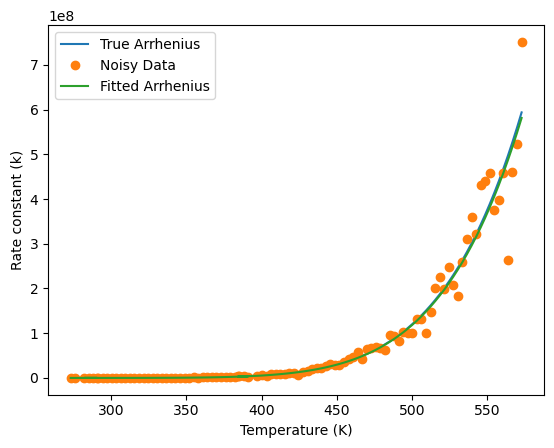

In [7]:
# Define the Arrhenius equation
def log_arrhenius(T, A, B, E):
  R = 8.314  # Ideal gas constant in J/(mol*K)
  return np.log(A+B*T) + (-E / (R * T))

T, log_k_noisy = data[:,0], np.log(data[:,1])

# Fit the Arrhenius equation to the noisy data
popt, pcov = curve_fit(log_arrhenius, T, log_k_noisy)

A_fit, B_fit, E_fit = popt

# Print the fitted parameters
print(f"Fitted A: {A_fit:.2e}")
print(f"Fitted B: {B_fit:.2e}")
print(f"Fitted E: {E_fit:.2f}")

# Plot the data and the fitted curve
plt.plot(T, k_true, label="True Arrhenius")
plt.plot(T, k_noisy, 'o', label="Noisy Data")
plt.plot(T, arrhenius(T, A_fit, B_fit, E_fit), label="Fitted Arrhenius")
plt.xlabel("Temperature (K)")
plt.ylabel("Rate constant (k)")
plt.legend()
plt.show()


# Question 2:

Discussion:
* Which optimization routine are you using? Why?
* How would your method change if $r$ were fixed and you had to determine $a$?
* Do you need an initial guess for r? How did you get it?
* What would happen if the ambient temperature increases 20 degrees?

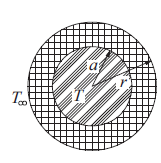

A wire carrying an electric current is surrounded by rubber insulation of outer radius $r$. The resistance of the wire generates heat, which is conducted through the insulation and convected into the surrounding air. The temperature of the wire can be shown to be:

$$ T = \frac{q}{2 \pi} \bigg[ \frac{ln(r/a)}{k} + \frac{1}{hr} \bigg] + T_\infty $$

where

- q = rate of heat generation in wire = 50 W/m
- a = radius of wire = 5mm
- k = thermal conductivity of rubber = 0.16 W/m · K
- h = convective heat-transfer coefficient = 20 W/m2 · K
- T∞ = ambient temperature = 280 K

Find $r$ that minimizes $T$

{method, imlementation, answer}


###Answer:



In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the temperature equation
def temperature(r, q, a, k, h, T_inf):
  return (q / (2 * np.pi)) * (np.log(r / a) / k + 1 / (h * r)) + T_inf

# Define the parameters
q = 50  # W/m
a = 0.005  # m
k = 0.16  # W/m*K
h = 20  # W/m^2*K
T_inf = 280  # K

# Define the objective function to minimize (temperature)
def objective_function(r):
  return temperature(r, q, a, k, h, T_inf)


# Initial guess for r (must be greater than a)
initial_guess = 0.01

# Use the minimize function to find the optimal r
result = minimize(objective_function, initial_guess, method='Nelder-Mead')

# Print the optimal radius
print(f"The radius that minimizes temperature is: {result.x[0]:.4f} m")
print(f"The minimum temperature is: {result.fun:.2f} K")

The radius that minimizes temperature is: 0.0080 m
The minimum temperature is: 353.11 K


# Question 3:

Discussion:
* What kind of constraints do you have? (equality constraints)
* How are you adding the constraints to the system? (How they inform the optimizer -> You have to create equality constraint functions and pass them as arguments)
* Right now the problem has $B\ne0$ and $H=0$. What would you do if $H\ne 0$ and $B=0$? (Nothing, it works the same way)
* If you double the weights of both W_1 and W_2, would your answer change? (No, the optimimum depends only on the ratio of the two - you can see this by factoring one out of the objective).

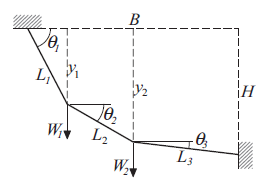

A cable fixed at the ends carrier the weights $W_1$ and $W_2$. The potential energy of the system is:

$$\begin{align} V &= -W_1 y_1 - W_2 y_2 \\
\end{align} $$

The principle of minimum potential energy states that the equilibrium configuration of the system is the one that satisfies geometric constraints and minimizes the potential energy.

You will be asked to determine the angles $\theta_1$, $\theta_2$, and $\theta_3$.

## a) Write out the objective function to be minimized in terms of theta

{answer}

###Answer
$$V = -W_1L_1 \sin(\theta_1) - W_2[L_1 \sin(\theta_1) +L_2 \sin(\theta_2)]$$

## b) Write out the constraints given the geometry and $B$ and $H$.
{answer}

### Answer:

$$\begin{align}
L_1 \cos(θ_1) + L_2 \cos(θ_2) + L_3 \cos(θ_3) = B \\
L_1 \sin(θ_1) + L_2 \sin(θ_2) + L_3 \sin(θ_3) = H
\end{align} $$

## c) Determine the equilibrium values of  $\theta_1$, $\theta_2$, and $\theta_3$ given:

$L_1 = 1.2 m$, $L_2 = 1.5 m$, $L_3 = 1.0 m$, $B = 3.5 m$, $H = 0$, $W_1 = 20 kN$, and $W2 = 30 kN$.

{method, implementation, answer}

### Answer:

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function (potential energy)
def objective_function(theta, L1, L2, W1, W2):
    theta1, theta2, theta3 = theta
    V = -W1 * L1 * np.sin(theta1) - W2 * (L1 * np.sin(theta1) + L2 * np.sin(theta2))
    return V

# Define the constraint functions
def constraint1(theta, L1, L2, L3, B):
    theta1, theta2, theta3 = theta
    return L1 * np.cos(theta1) + L2 * np.cos(theta2) + L3 * np.cos(theta3) - B

def constraint2(theta, L1, L2, L3, H):
    theta1, theta2, theta3 = theta
    return L1 * np.sin(theta1) + L2 * np.sin(theta2) + L3 * np.sin(theta3) - H


# Given parameters
L1 = 1.2
L2 = 1.5
L3 = 1.0
B = 3.5
H = 0
W1 = 20
W2 = 30

# Initial guess for theta
initial_guess = [0.1, 0.1, 0.1]

# Define the constraints
cons = ({'type': 'eq', 'fun': constraint1, 'args': (L1, L2, L3, B)},
        {'type': 'eq', 'fun': constraint2, 'args': (L1, L2, L3, H)})

# Use the minimize function to find the optimal theta
result = minimize(objective_function, initial_guess, args=(L1, L2, W1, W2), method='SLSQP', constraints=cons)


# Print the optimal angles
print(f"The equilibrium values of theta are:")
print(f"theta1: {np.degrees(result.x[0]):.2f} degrees")
print(f"theta2: {np.degrees(result.x[1]):.2f} degrees")
print(f"theta3: {np.degrees(result.x[2]):.2f} degrees")


The equilibrium values of theta are:
theta1: 21.36 degrees
theta2: 1.25 degrees
theta3: -28.02 degrees
